In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("D:/Codes/Credit card fraud/creditcard.csv")

In [3]:
data.head()
data.shape[0]


284807

In [4]:
fraud = data[data['Class']==1]
fraud.head()
fraud['Class'].sum()

492

In [5]:
normal = data[data['Class']==0]
normal.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Add desciprive data ana lysis here
# exploratory data analysis

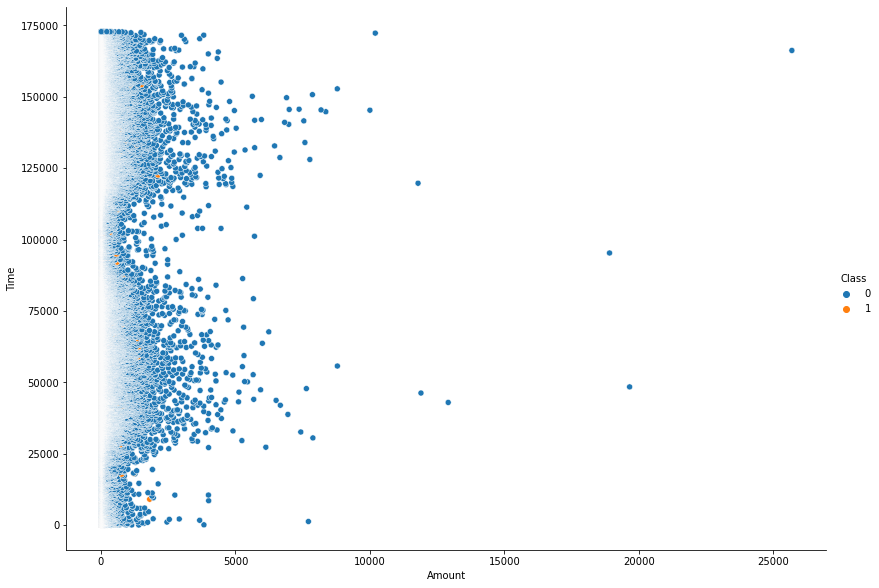

In [6]:
sns.relplot(x='Amount',y='Time',hue='Class', data=data,height=8.27, aspect=11.7/8.27)


## ML Model

In [7]:
x= data.iloc[:,:-1]   # all the values in the data which will be used to predict the y value
y=data['Class']       # The y value which will be 0 and 1. The model will try to predict 1 or 0

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) # 80% train 20% test

clf = linear_model.LogisticRegression(C=1e5)     #creating the classifier

clf.fit(x_train,y_train)

C:\Users\shzso\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

In [9]:
y_pred = np.array(clf.predict(x_test))
y=np.array(y_test)

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [11]:
accuracy_score(y,y_pred)

0.9988588883817282

In [15]:
confusion_matrix(y,y_pred)

array([[56815,    29],
       [   36,    82]], dtype=int64)

In [13]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56844
           1       0.74      0.69      0.72       118

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962

